In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('UCL_zoo_dataset.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
X = df.drop(['class_type','animal_name'],axis=1)

In [6]:
Y=df['class_type']

In [7]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=100)

In [12]:
from sklearn import tree

In [13]:
model=tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
Y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
print(accuracy_score(Y_test,Y_pred))

1.0


In [18]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [19]:
print(confusion_matrix(Y_test,Y_pred))

[[8 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.7, 0.9285714285714286, 'X[3] <= 0.192\nentropy = 2.365\nsamples = 80\nvalue = [33, 14, 4, 11, 2, 6, 10]'),
 Text(0.6, 0.7857142857142857, 'X[8] <= -0.841\nentropy = 2.361\nsamples = 47\nvalue = [0, 14, 4, 11, 2, 6, 10]'),
 Text(0.4, 0.6428571428571429, 'X[4] <= 0.616\nentropy = 0.954\nsamples = 16\nvalue = [0, 0, 0, 0, 0, 6, 10]'),
 Text(0.3, 0.5, 'X[6] <= -0.11\nentropy = 0.439\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 1, 10]'),
 Text(0.2, 0.35714285714285715, 'X[12] <= 0.078\nentropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]'),
 Text(0.1, 0.21428571428571427, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]'),
 Text(0.3, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]'),
 Text(0.4, 0.35714285714285715, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 0, 8]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0]'),
 Text(0.8, 0.6428571428571429, 'X[1] <= 0.758\nentropy = 1.685\nsamples = 31\nvalue = [0,

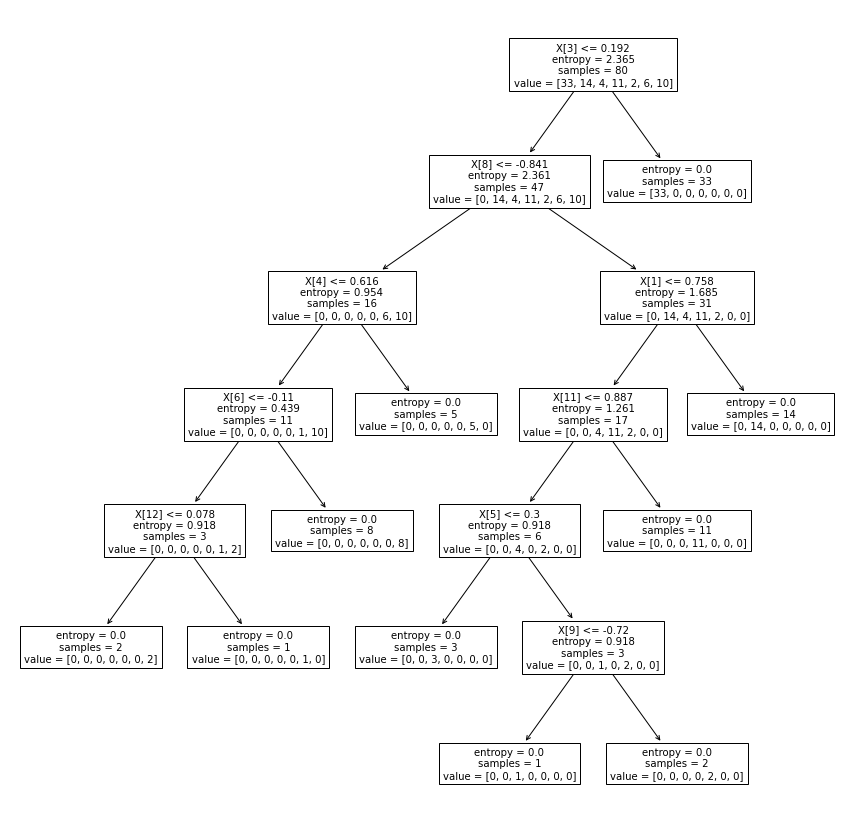

In [21]:
plt.figure(figsize = (15,15))
plot_tree(model)

